<img src="./logo_UTN.svg" align="right" width="150"> 

# Tarea Semanal 3
#### Autor: Tobías Guerrero

## Consigna

<img src="./plantilla.png" align="center" width="600"/>

A partir de la plantilla propuesta, se pide:
1. Obtener la transferencia para máxima planicidad en la banda de paso utilizando los conceptos de partes de función.
2. Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia.
3. Implementar el circuito normalizado con estructuras pasivas separadas mediante buffers.
4. Obtenga el circuito que cumpla con la plantilla requerida si dispone de capacitores de 100nf.
5. Proponga una red que se comporte igual a la hallada en 4) pero con resistores, capacitores y opamps.
6. Proponer un planteo alternativo a 1) usando la $\omega_{Butter}$

## 1. Transferencia

A partir de los datos de la plantilla, se llegó a la siguiente transferencia:

$\large T_{s} = \frac{1,96}{s^{3} + 2,51 \cdot s^{2} + 3,14 \cdot s + 1,96} = \frac{1,25}{s + 1,25} \cdot \frac{1,57}{s^{2} + 1,26 s + 1,57}$

El procedimiento y los cálculos se incluyen en el anexo.

### Verificación numérica

Para verificar la transferencia hallada se recurrió a la simulación numérica de la plantilla en Python. El desarrollo se muestra a continuación.

In [1]:
# Se importan las librerías necesarias
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, TransferFunction
import numpy as np
from math import log, sqrt, ceil

In [2]:
# Se cargan los datos de la plantilla
amax = 1
amin = 12
fp = 1
fs = 2

In [3]:
# Se calculan epsilon y el orden n
ee = 10**(amax/10) - 1
n = ceil(log(sqrt(((10**(amin/10))-1)/((10**(amax/10)-1))))/log(fs/fp))

In [4]:
# Se crea un array que representará el denominador de la transferencia de Butter al cuadrado
butter = np.zeros(2*n + 1)
butter[-1] = 1/ee
butter[0] = -1

In [5]:
# Se hallan las raíces del denominador de Butter. Se eligen las que tienen parte real negativa, y con ellas se arman
# polinomios de orden 1
aa = np.roots(butter)
raices = aa[ np.real(aa) < 0 ]

poli1_0 = np.array([ 1, -raices[0] ])
poli1_1 = np.array([ 1, -raices[1] ])
poli1_2 = np.array([ 1, -raices[2] ])

In [6]:
# Se multiplican los polinomios de orden 1 para hallar el denominador de la transferencia. Se observa que los coeficientes
# coinciden con los encontrados en papel
# En realidad me dan negativos los coeficientes pares. Esto es un error. CONSULTAR
# El error estaba en que los polinomios de orden 1 se arman con "-raiz", y no con "raiz". Lo dejo expresado para recordarlo.

poli_aux = np.polymul(poli1_1,poli1_2)

den = np.polymul( poli_aux , poli1_0 )

print( den )

[1.        +0.j 2.50515278+0.j 3.13789522+0.j 1.96522673+0.j]


## 2. Diagrama de polos y ceros. Respuesta en frecuencia

Este apartado se realizó mediante dos métodos distintos. 

Por un lado, se realizaron los gráficos a mano en papel. Estos se adjuntan en el anexo.

Luego, se verificaron los gráficos realizados mediante simulación numérica en Python, la cual se desarrolla a continuación.

In [7]:
# Configuración de gráficos
import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
mpl.rcParams.update({'font.size':fig_font_size})

In [8]:
#Se usa la función TransferFunction para plantear la transferencia hallada, utilizando el denominador hallado y un numerador
# de orden 0 igual al coeficiente de orden 0 del denominador para obtener una transferencia de 0dB

num = np.array([1.96])

tf = TransferFunction(num,den)

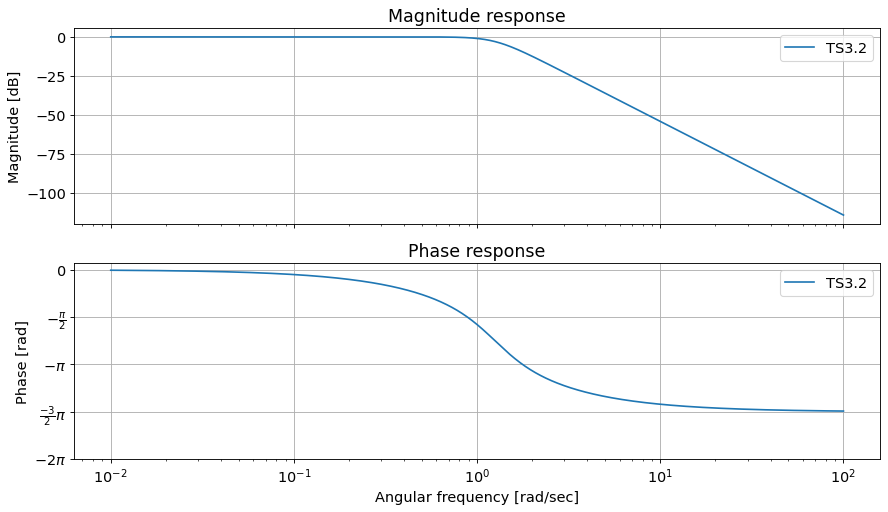

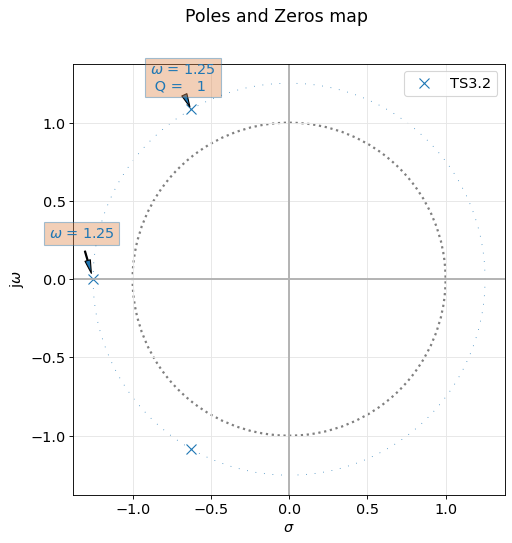

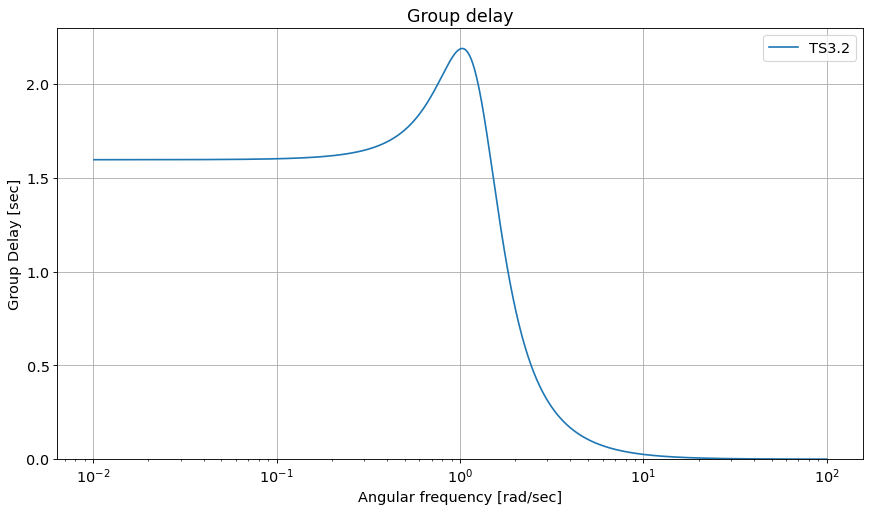

In [9]:
#Se realizan los gráficos
analyze_sys(tf,sys_name='TS3.2')

## 3. Implementación normalizada

Para la transferencia de orden 1 se propone un circuito pasabajos RC. Analizando este circuito, se halla que para la implementación, $\frac{1}{RC} = 1,25$
Tomando como referencia el capacitor, $C = 1$ y $R = 0,8$

Para la transferencia de orden 2, se propone un circuito pasabajos RLC. Analizando el circuito, se llega a que $\frac{1}{LC} = 1,57$ y $\frac{R}{L} = 1,25$.
Nuevamente, tomando como referencia el capacitor, resulta $C = 1$, $L = 0,64$ y $R = 0,8$.

Se adjuntan imágenes del circuito y de la simulación.

<img src="./normalizado.png" align="center" width="600"/>
<img src="./normalizado_graf.png" align="center" width="600"/>

Luego, se realizó una simulación numérica en Python. El código se desarrolla a continuación.

## 4. Desnormalización

Al haber tomado como referencia el capacitor, de forma que $C_{n} = 1$, se puede hallar la norma de impedancia, sabiendo que $\Omega_{\omega} = 2\pi \cdot 1,5kHz$ y que $C = 100nF$:

$\Omega_{Z} = \frac{1}{\Omega_{\omega} \cdot C} = 1061\Omega$

De esta forma: 

$R = R_{n} \cdot \Omega_{\omega} = 848\Omega$

$L = \frac{\Omega_{Z}}{\Omega_{\omega} \cdot L_{n}} = 72mHy$

Se adjuntan imágenes del circuito y de la simulación.

<img src="./desnormalizado.png" align="center" width="600"/>
<img src="./normalizado_graf.png" align="center" width="600"/>

## 5. Implementación sin inductores

Para la realización de este punto, primero se aplicó la regla de Bruton al circuito de segundo orden, que consiste en obtener un circuito equivalente dividiendo todas las impedancias por $s$. De esta forma, se obtuvo un circuito conformado por un capacitor de valor $\frac{1}{R}$, un resistor de valor $L$ y un FDNR de valor $\frac{1}{C}$. Como $C = 1$, la implementación más sencilla surge de tomar todas las impedancias iguales a 1, como se muestra en el circuito a continuación. En la simulación, se observa que el circuito presenta la misma respuesta en frecuencia que el hallado en el punto 4.

<img src="./fdnr.png" align="center" width="600"/>
<img src="./fdnr_graf.png" align="center" width="600"/>

## 6. Resolución aplicando $\omega_{Butter}$

Para este punto, en primera instancia se calculó la norma de Butterworth, que resultó $\omega_{Butter} = 2\pi \cdot 1,5kHz \cdot \epsilon^{\frac{-1}{n}} = 1,25$.
Luego, se implementó una transferencia de Butterworth de 3 orden con el mismo circuito propuesto en 3., para luego desnormalizar con la norma hallada. Los componentes, como es de esperarse, resultan iguales que en el punto 4. No se incluyó la simulación circuital de este punto ya que es equivalente a la de este punto mencionado.

## Anexo - Desarrollo en papel

<img src="./pag1.jpg" align="center" width="600"/>
<img src="./pag2.jpg" align="center" width="600"/>
<img src="./pag3.jpg" align="center" width="600"/>